# Gaussian Beams

A notebook to plot Gaussian beams.

Auhtor(s): *Martin Fränzl*

In [12]:
import numpy as np
pi = np.pi
from matplotlib import pyplot as plt
%matplotlib inline

from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams.update({'font.size' : 14,
                     'text.latex.unicode': True,
                     'axes.labelpad' : 10,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',
                     'lines.linewidth' : 1,}) 

The electric field of a Gaussian beam is given as:
\begin{equation}
E(r,z) = E_0\frac{w_0}{w(z)}\exp\left(-\frac{r^2}{w(z)^2}\right)\exp\left(-\mathrm ik z-\mathrm ik\frac{r^2}{2R(z)}+\mathrm i\zeta(z)\right)
\end{equation} 
Here, $w(z$) is the radius of the beam where $E(z,r) = 1/\mathrm e$:
\begin{equation}
w(z) = w_0\sqrt{1+\left(\frac{z}{z_\mathrm{R}}\right)^2}\ , 
\end{equation}
$z_\mathrm{R} = \pi w_0^2/\lambda$ with the Rayleigh range, $R(z)$ is the curvature of the wavefronts:
\begin{equation}
R(z) = z\left(1+\left(\frac{z_\mathrm{R}}{z}\right)^2\right),
\end{equation} 
and $\zeta(z) = \arctan(z/z_\mathrm{R})$ the Gouy phase shift.

In [13]:
lda = 532e-9 # wavelength
w0 = lda # beam waist

zR = pi*w0**2/lda
k = 2*pi/lda

def w(z):
    return w0*np.sqrt(1+(z/zR)**2)

def R(z):
    return z*(1+(zR/z)**2)

def E(r,z):
    return w0/w(z)*np.exp(-(r/w(z))**2)*np.exp(-1j*k*z-1j*k*r**2/(2*R(z))+1j*np.arctan(z/zR))

In [14]:
x = np.linspace(-5e-6, 5e-6,1000)
y = np.linspace(-5e-6, 5e-6,1000)
X, Y = np.meshgrid(x, y)

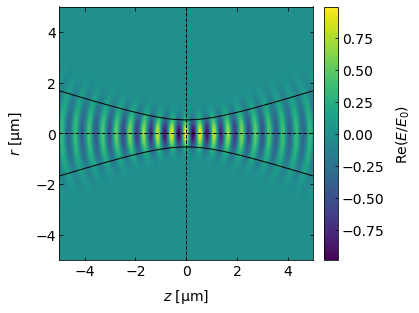

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
im = ax.pcolormesh(Y*1e6, X*1e6, np.real(E(X,Y)), cmap='viridis')
ax.plot(x*1e6, w(x)*1e6, 'k')
ax.plot(x*1e6, -w(x)*1e6, 'k')
ax.axvline(x=0, c='k', ls='--')
ax.axhline(y=0, c='k', ls='--')
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size=0.2, pad=0.15)
cbar = plt.colorbar(im, cax=cax)
ax.set_xlabel('$z$ [µm]')
ax.set_ylabel('$r$ [µm]')
cbar.ax.set_ylabel(r'Re$(E/E_0)$')
plt.show()

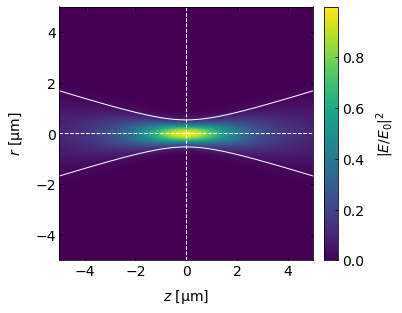

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
im = ax.pcolormesh(Y*1e6, X*1e6, np.abs(E(X,Y))**2, cmap='viridis')
ax.plot(x*1e6, w(x)*1e6, 'w')
ax.plot(x*1e6, -w(x)*1e6,'w')
ax.axvline(x=0, c='w', ls='--')
ax.axhline(y=0, c='w', ls='--')
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size=0.2, pad=0.15)
cbar = plt.colorbar(im, cax=cax)
ax.set_xlabel('$z$ [µm]')
ax.set_ylabel('$r$ [µm]')
cbar.ax.set_ylabel(r'$|E/E_0|^2$')
plt.show()